Non-uniform random distributions
--------------------------------

In the previous section we learned how to generate random numbers from
a uniform probability distribution in an interval $[a,b]$. This
distribution was normalized, so that $$\int _a^b {P(x)dx}=1.$$ Hence, the uniform distribution *by definition* is
$P(x)=1/(b-a)$.

Now, suppose that we generate a sequence $\{x_i\}$ and we take some
function of it to generate $\{y(x_i)\}=\{y_i\}$. This new sequence is
going to be distributed according to some probability density $P(y)$,
such that $$P(y)dy=P(x)dx$$ or $$P(y)=P(x)\frac{dx}{dy}.$$

If we want to generate a desired normalized distribution $P(y)$ from a uniform distribution $P(x)$, we need
to solve the differential equation: $$\frac{dx}{dy}=P(y).$$ But the
solution of this is $$x=\int _0^y {P(y')dy'}=F(y).$$ Therefore,
$$y(x)=F^{-1}(x),\label{invert}$$ 
where $F^{-1}$ is the inverse of $F$.

### Example: Exponential distribution

As an example, let us take $y(x)=-\ln{(x)}$ with $P(x)$ representing a
uniform distribution in the interval $[0,1]$. Then
$$P(y)=\frac{dx}{dy}=e^{-y},$$ which is distributed exponentially. This
distribution occurs frequently in real problems such as the radioactive
decay of nuclei. You can also see that the quantity $y/\lambda$ has the
distribution $\lambda
e^{-\lambda y}$.




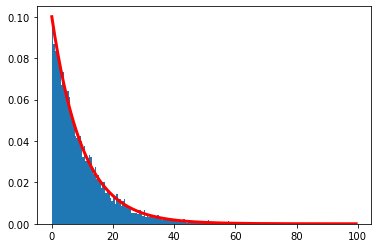

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 10000
r = np.random.random(N) # draw from a uniform distribution

xlambda = 0.1 
x = -np.log(r)/xlambda

binwidth=xlambda*5

pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);

# Drawing random numbers from distributions
You can draw random numbers from known distributions by using a subpackage of `scipy` called [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html). This package contains functions relating to statistical tests and statistical distributions, both continuous and discrete. Keep this package in mind!

You can accomplish the same programs in Python as we did in MATLAB. Here is `isotopedecay`, which models the decay of Thallium to Lead.

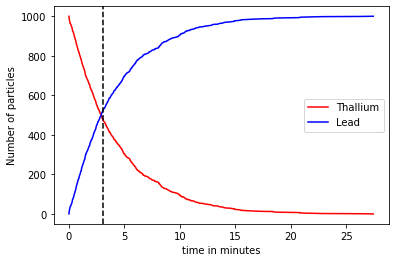

In [2]:
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as mp
#Script models the decay of 1000 Thallium atoms to lead by drawing from a nonuniform probability distribution
NT = 1000;
NPb = 0
lifetime = 3.053/np.log(2) #lifetime of Thallium in minutes

# draw exp distribution
from scipy.stats import expon
data_expon = expon.rvs(scale=lifetime,loc=0,size=1000)
timepoints = np.sort(data_expon)
Tpoints = np.linspace(NT,0,NT)
Pbpoints = np.linspace(0,NT,NT)
mp.plot(timepoints,Tpoints,'r',label="Thallium")
mp.plot(timepoints,Pbpoints,'b',label="Lead")
mp.axvline(x=lifetime*np.log(2), color='k', linestyle='--')
mp.xlabel("time in minutes")
mp.ylabel("Number of particles")
mp.legend()

## Zombie Monte Carlo

(11, 'Zombies')

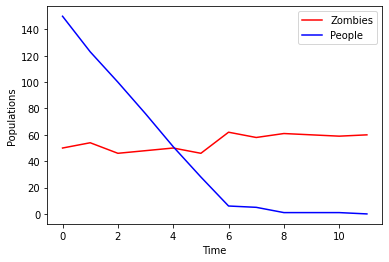

In [20]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as mp

def zombies(Nz,Np,p):
    """Takes zombie population, people population, and probability of person transforming to zombie. Assumption of the model: person only encounters at most 1 zombie a day"""
    time = 0
    pop0 = Nz+Np
    Nzseries = [Nz]
    Npseries =  [Np]
    tseries = [time]
    while Nz>0 and Np>0 and time<100:
        zsuccess = binom.rvs(n=np.min([Nz,Np]),p=p,size=1,loc=0)
        psuccess = np.min([Nz, Np]) - zsuccess
        Nz = Nz + zsuccess -psuccess
        Np = Np - zsuccess
        #increment time step
        time = time + 1
        Nzseries.append(Nz)
        Npseries.append(Np)
        tseries.append(time)
        
    mp.plot(tseries,Nzseries,'r',label="Zombies")
    mp.plot(tseries,Npseries,'b',label="People")
    mp.xlabel("Time")
    mp.ylabel("Populations")
    mp.legend()
    if Np>Nz:
        winner = "People"
    else:
        winner = "Zombies"
    return time,winner

zombies(50,150,0.5)